# Analyzing data from World Happiness Report 2023 

Data: Data for Figure 2.1

Source: https://worldhappiness.report/ed/2023/#appendices-and-data

This notebook aims to find insights provided by the above mentioned data, trying to establish connections between variables and summarizing important data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import plotly.express as px
import seaborn as sb

Some data transformation: changing column format 

In [3]:
data = pd.read_excel('DataForFigure2.1WHR2023.xls')
data.columns = [x.lower() for x in data.columns]
data.columns = data.columns.str.replace(' ', '_')
data = data.sort_values("country_name").reset_index(drop=True)

data

,country_name,ladder_score,standard_error_of_ladder_score,upperwhisker,lowerwhisker,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,explained_by:_log_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,dystopia_+_residual
0,Afghanistan,1.8590,0.032506,1.922712,1.795288,7.324032,0.341341,54.712410,0.381642,-0.081011,0.847215,1.777825,0.644600,0.000000,0.086704,0.000000,0.092965,0.058644,0.976065
1,Albania,5.2773,0.065719,5.406110,5.148490,9.567472,0.717909,69.150070,0.794328,-0.006932,0.878094,1.777825,1.449203,0.951221,0.480082,0.549172,0.132712,0.036527,1.678425
2,Algeria,5.3291,0.062136,5.450887,5.207313,9.300214,0.855219,66.549232,0.571240,-0.117374,0.716906,1.777825,1.353352,1.298068,0.409218,0.252304,0.073455,0.151980,1.790695
3,Argentina,6.0237,0.062890,6.146965,5.900436,9.958788,0.890890,67.200081,0.822678,-0.089480,0.814013,1.777825,1.589548,1.388174,0.426952,0.586899,0.088421,0.082425,1.861257
4,Armenia,5.3417,0.065702,5.470475,5.212925,9.614713,0.790231,67.788971,0.795605,-0.155315,0.705434,1.777825,1.466146,1.133907,0.442997,0.550872,0.053097,0.160197,1.534475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Uzbekistan,6.0143,0.058900,6.129744,5.898856,8.948406,0.874754,65.300514,0.937915,0.229532,0.638172,1.777825,1.227177,1.347414,0.375195,0.740247,0.259586,0.208374,1.856308
133,Venezuela,5.2106,0.063895,5.335835,5.085365,5.526723,0.838825,64.049835,0.658707,0.128371,0.811435,1.777825,0.000000,1.256658,0.341118,0.368698,0.205308,0.084272,2.954561
134,Vietnam,5.7633,0.051805,5.864837,5.661763,9.286939,0.821143,65.502419,0.938641,-0.003643,0.758844,1.777825,1.348591,1.211991,0.380696,0.741213,0.134477,0.121941,1.824439
135,Zambia,3.9822,0.094396,4.167217,3.797183,8.073852,0.693536,55.032139,0.790871,0.098389,0.817557,1.777825,0.913520,0.889654,0.095416,0.544573,0.189222,0.079887,1.269958


According to the report, the *ladder score* is a measure based on the answers of people thinking of themselves as a ladder, with the best possible life for them being a 10 and the worst possible life being a 0. 

In [3]:
print(data.columns)

Index(['country_name', 'ladder_score', 'standard_error_of_ladder_score',
       'upperwhisker', 'lowerwhisker', 'logged_gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'ladder_score_in_dystopia',
       'explained_by:_log_gdp_per_capita', 'explained_by:_social_support',
       'explained_by:_healthy_life_expectancy',
       'explained_by:_freedom_to_make_life_choices',
       'explained_by:_generosity', 'explained_by:_perceptions_of_corruption',
       'dystopia_+_residual'],
      dtype='object')


We want to know which country has the highest and the lowest value in each column, so we are setting up a new dataframe with those values

In [4]:
dfmax = data.max()
dfmin = data.min()

In [ ]:
data.iloc[0,1]
data.iloc[0][1]
data[data[df.index[1]]==df[1]][[df.index[0], df.index[1]]]
data[data[df.index[2]]==df[2]][[df.index[0], df.index[2]]]

,country_name,standard_error_of_ladder_score
78,Mauritania,0.146538


In [5]:
dictmax = []
dictmin = []
for i in range(1,data.shape[1]):
    pais = data[data[dfmax.index[i]]==dfmax[i]][dfmax.index[0]].values[0]
    valor = data[data[dfmax.index[i]]==dfmax[i]][dfmax.index[i]].values[0]
    nome = data[data[dfmax.index[i]]==dfmax[i]][dfmax.index[i]].name

    pais1 = data[data[dfmin.index[i]]==dfmin[i]][dfmin.index[0]].values[0]
    valor1 = data[data[dfmin.index[i]]==dfmin[i]][dfmin.index[i]].values[0]
    nome1 = data[data[dfmin.index[i]]==dfmin[i]][dfmin.index[i]].name

    dictmax.append({'country_name': pais,'col_name':nome ,'max_col_value':valor, })
    dictmin.append({'country_name': pais1,'col_name':nome1 ,'min_col_value':valor1, })


## Dataframe showing maximum column values per country

In [6]:
df2 = pd.DataFrame(dictmax)
df2

,country_name,col_name,max_col_value
0,Finland,ladder_score,7.804200
1,Mauritania,standard_error_of_ladder_score,0.146538
2,Finland,upperwhisker,7.875078
3,Finland,lowerwhisker,7.733322
4,Luxembourg,logged_gdp_per_capita,11.659949
5,Iceland,social_support,0.982533
6,Hong Kong S.A.R. of China,healthy_life_expectancy,77.279778
7,Finland,freedom_to_make_life_choices,0.961408
8,Indonesia,generosity,0.531386
9,Romania,perceptions_of_corruption,0.929089


## Dataframe showing minimum column values per country

In [7]:
df3 = pd.DataFrame(dictmin)
df3

,country_name,col_name,min_col_value
0,Afghanistan,ladder_score,1.859000
1,India,standard_error_of_ladder_score,0.028552
2,Afghanistan,upperwhisker,1.922712
3,Afghanistan,lowerwhisker,1.795288
4,Venezuela,logged_gdp_per_capita,5.526723
5,Afghanistan,social_support,0.341341
6,Mozambique,healthy_life_expectancy,51.530212
7,Afghanistan,freedom_to_make_life_choices,0.381642
8,Georgia,generosity,-0.254276
9,Singapore,perceptions_of_corruption,0.146112


In [8]:
data.describe().loc[['min','max','mean']]

,ladder_score,standard_error_of_ladder_score,upperwhisker,lowerwhisker,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,explained_by:_log_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,dystopia_+_residual
min,1.859000,0.028552,1.922712,1.795288,5.526723,0.341341,51.530212,0.381642,-0.254276,0.146112,1.777825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.109798
max,7.804200,0.146538,7.875078,7.733322,11.659949,0.982533,77.279778,0.961408,0.531386,0.929089,1.777825,2.199664,1.619666,0.701590,0.771510,0.421545,0.560821,2.954561
mean,5.539755,0.064672,5.666513,5.412998,9.449785,0.799045,64.967627,0.787427,0.022444,0.725375,1.777825,1.406995,1.156171,0.366125,0.539989,0.148474,0.145914,1.777825


As shown above, in Finland people consider as having the best life among all countries, as in Afghanistan this is the total opposite.

Also, Luxembourg shows as the highest GDP per capita.

Hong Kong has the highest life expectancy and in Finland people are considered the most free to make life choices.

Now let's see if any of the values correlate to each other.

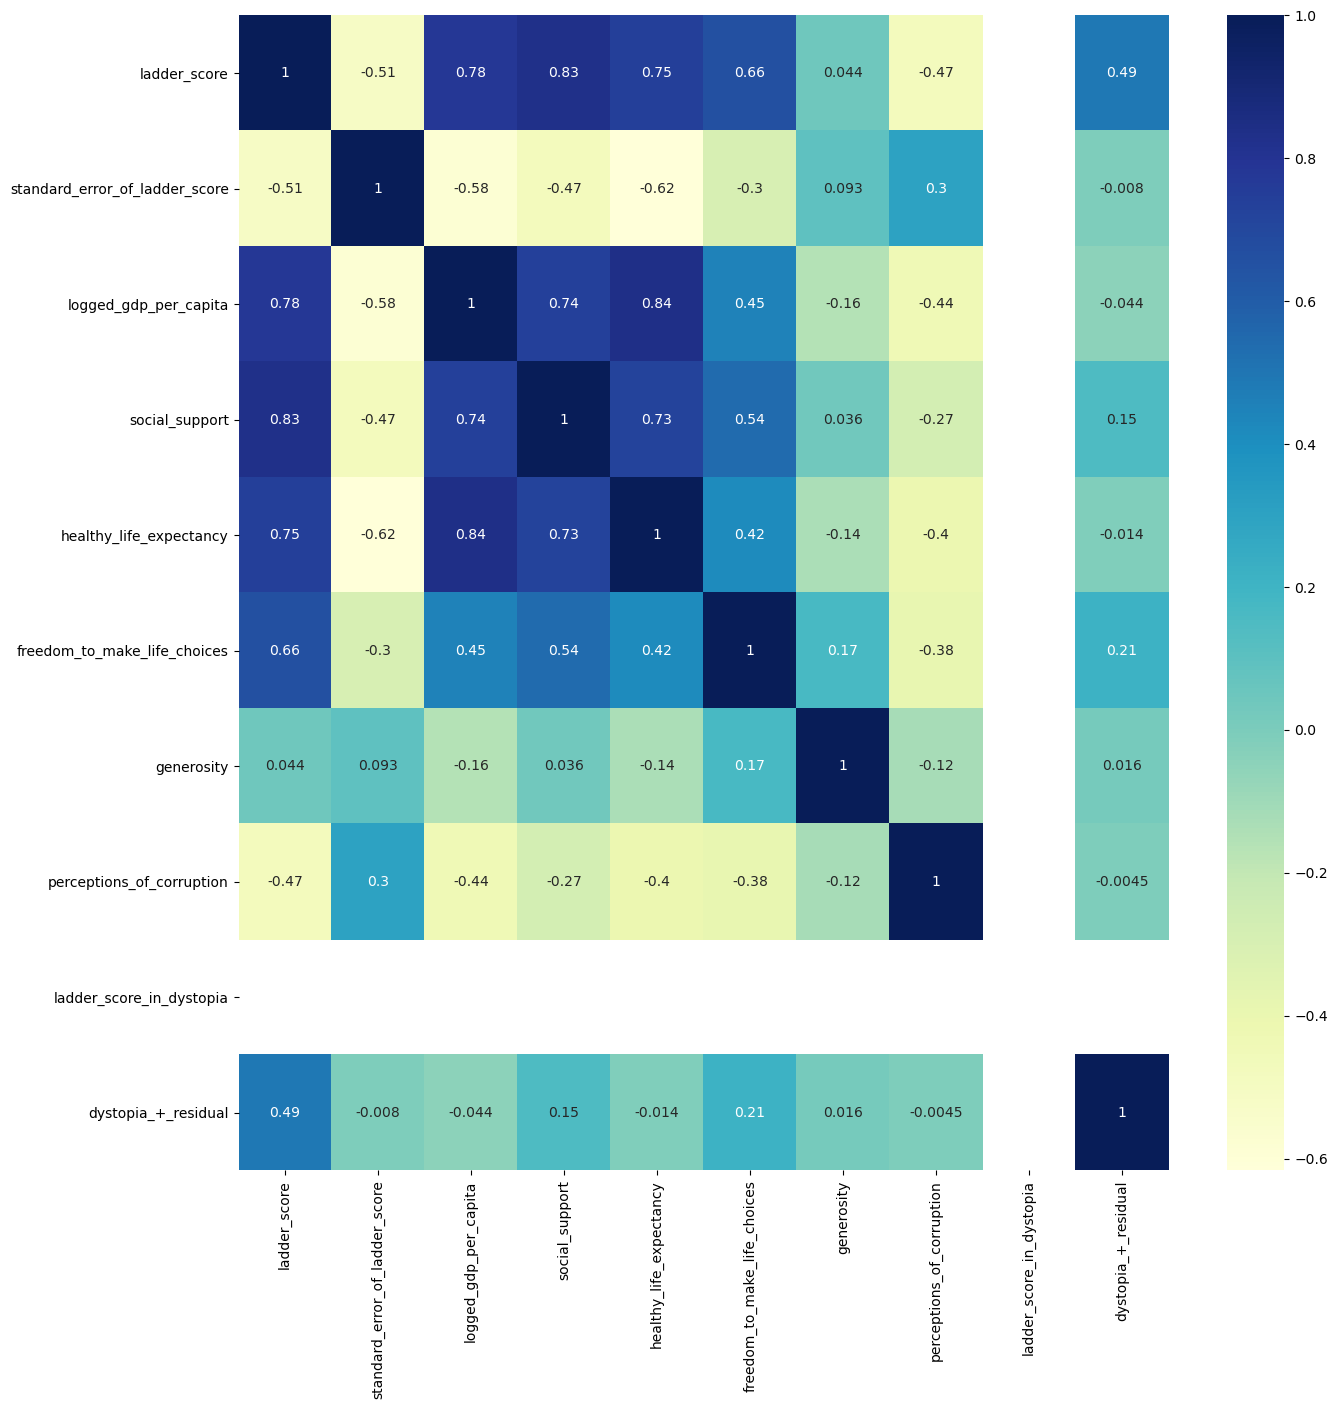

In [10]:
# plotting correlation heatmap

# selecting less columns than entire dataframe
dataheat = data[['country_name', 'ladder_score', 'standard_error_of_ladder_score',
       'logged_gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'ladder_score_in_dystopia',
          'dystopia_+_residual']]

fig, ax = plt.subplots(figsize=(15,15))
dataplot = sb.heatmap(dataheat.corr(), cmap="YlGnBu", annot=True, ax=ax)
  
# displaying heatmap
plt.show()

Ladder score has a very high correlation to social support, which makes sense, since assisted people feel safer that other people are taking care of them.

Healthy life expectancy is highly correlated with GDP per capita, ladder score and social support. This is explained by the fact that a wealthy person has the means to access all sorts of areas that may improve their health, which can be the best doctors, the best hospitals, knowledge, nutrition and exercising, things that cost a lot of money nowadays. Also they can buy access to the best practices, what may optimize their health, as long as they live on healthy habits.

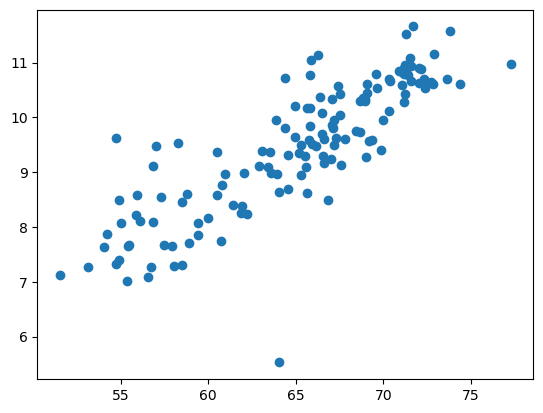

In [11]:
# healthy life expectancy vs gdp per capita
# data[['country_name','logged_gdp_per_capita','social_support','healthy_life_expectancy'  ]]
plt.scatter(data['healthy_life_expectancy'], data['logged_gdp_per_capita'])

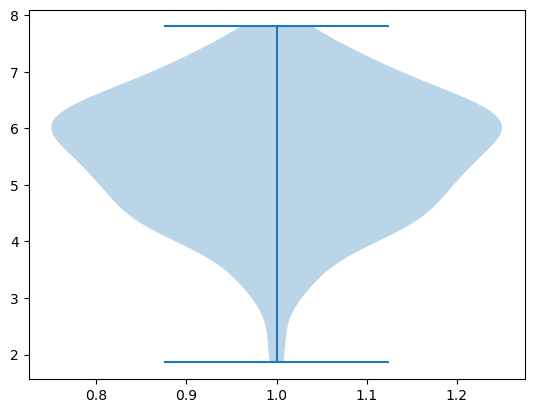

In [5]:
plt.violinplot(data["ladder_score"])
plt.show()

In [35]:
fig = px.violin(data, y="ladder_score", box=True, points="all", )
fig.show()